## Загрузка

In [398]:
import pandas as pd
import numpy as np

In [399]:
data = pd.read_csv('../data/heating_oil_consumption_and_cost.csv', encoding='utf-8', sep=',')
data.head()

,index,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,...,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
0,0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897085,2010-01,12/24/2009,01/26/2010,33,395416152700002-OIL,N,303.47,148.0
1,1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897086,2010-02,01/26/2010,02/25/2010,30,395416152700002-OIL,N,504.41,246.0
2,2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897087,2010-03,02/25/2010,03/26/2010,29,395416152700002-OIL,N,200.94,98.0
3,3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897088,2010-05,04/26/2010,05/24/2010,28,395416152700002-OIL,N,789.42,385.0
4,4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897089,2010-06,05/24/2010,06/23/2010,30,395416152700002-OIL,N,488.01,238.0


In [400]:
data.set_index('index', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14628 entries, 0 to 14627
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Development Name    14628 non-null  object 
 1   Borough             14628 non-null  object 
 2   Account Name        14628 non-null  object 
 3   Location            962 non-null    object 
 4   Meter AMR           14073 non-null  object 
 5   Meter Scope         22 non-null     object 
 6   TDS #               14628 non-null  int64  
 7   EDP                 14628 non-null  int64  
 8   RC Code             14628 non-null  object 
 9   Funding Source      13106 non-null  object 
 10  AMP #               12490 non-null  object 
 11  Vendor Name         14628 non-null  object 
 12  UMIS BILL ID        14628 non-null  int64  
 13  Revenue Month       14628 non-null  object 
 14  Service Start Date  14628 non-null  object 
 15  Service End Date    14628 non-null  object 
 16  # da

## Визуализация

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [403]:
plt.style.use('seaborn-v0_8')

Text(0.5, 0.98, 'Графики для первого датасета')

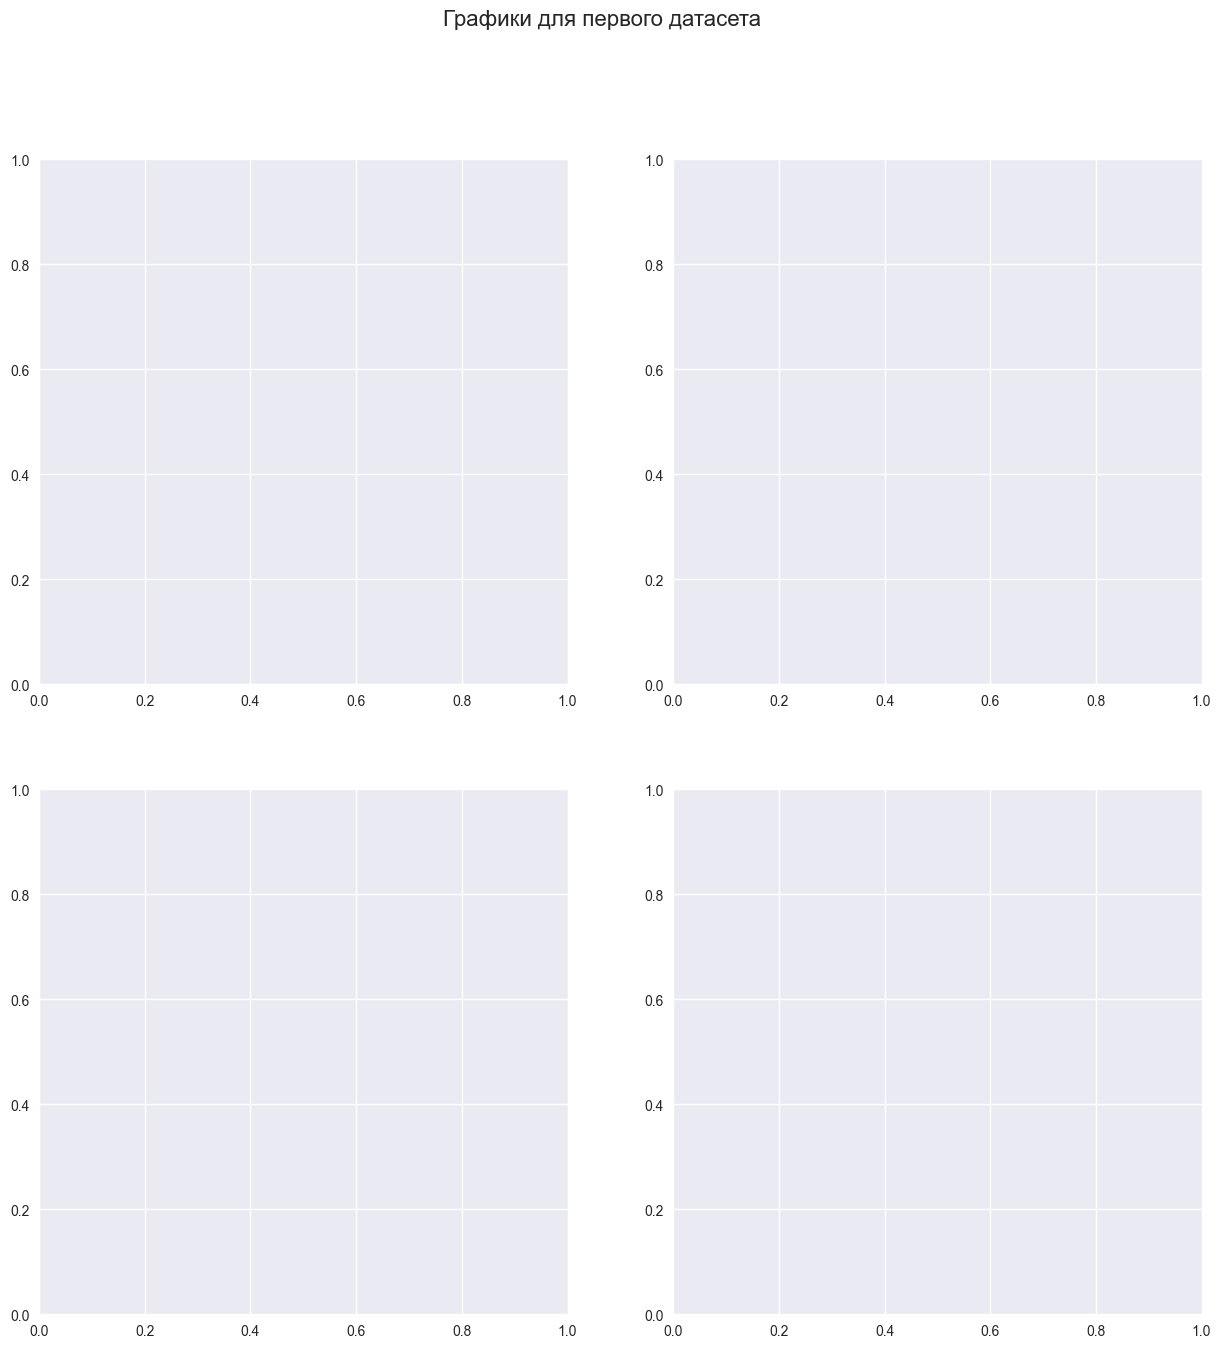

In [404]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Графики для первого датасета', fontsize=16)

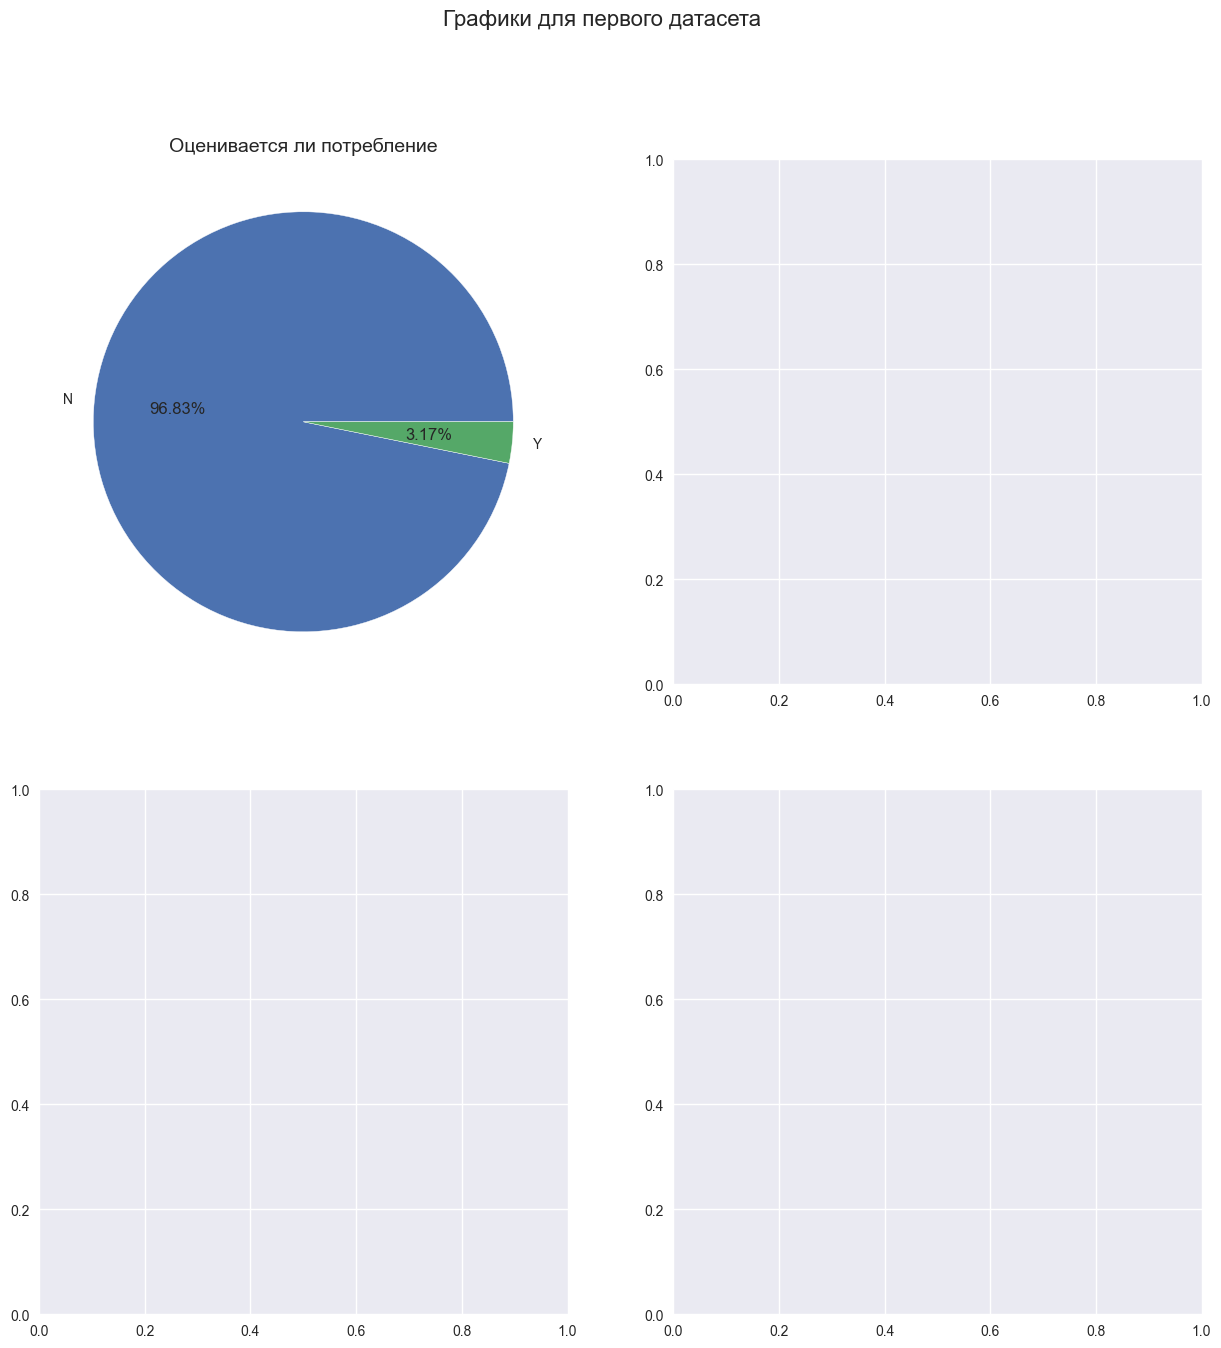

In [405]:
labels, counts = np.unique(data['Estimated'], return_counts=True)

axes[0,0].set_title('Оценивается ли потребление', fontsize=14)
axes[0,0].pie(counts, labels=labels, autopct='%.2f%%')
fig

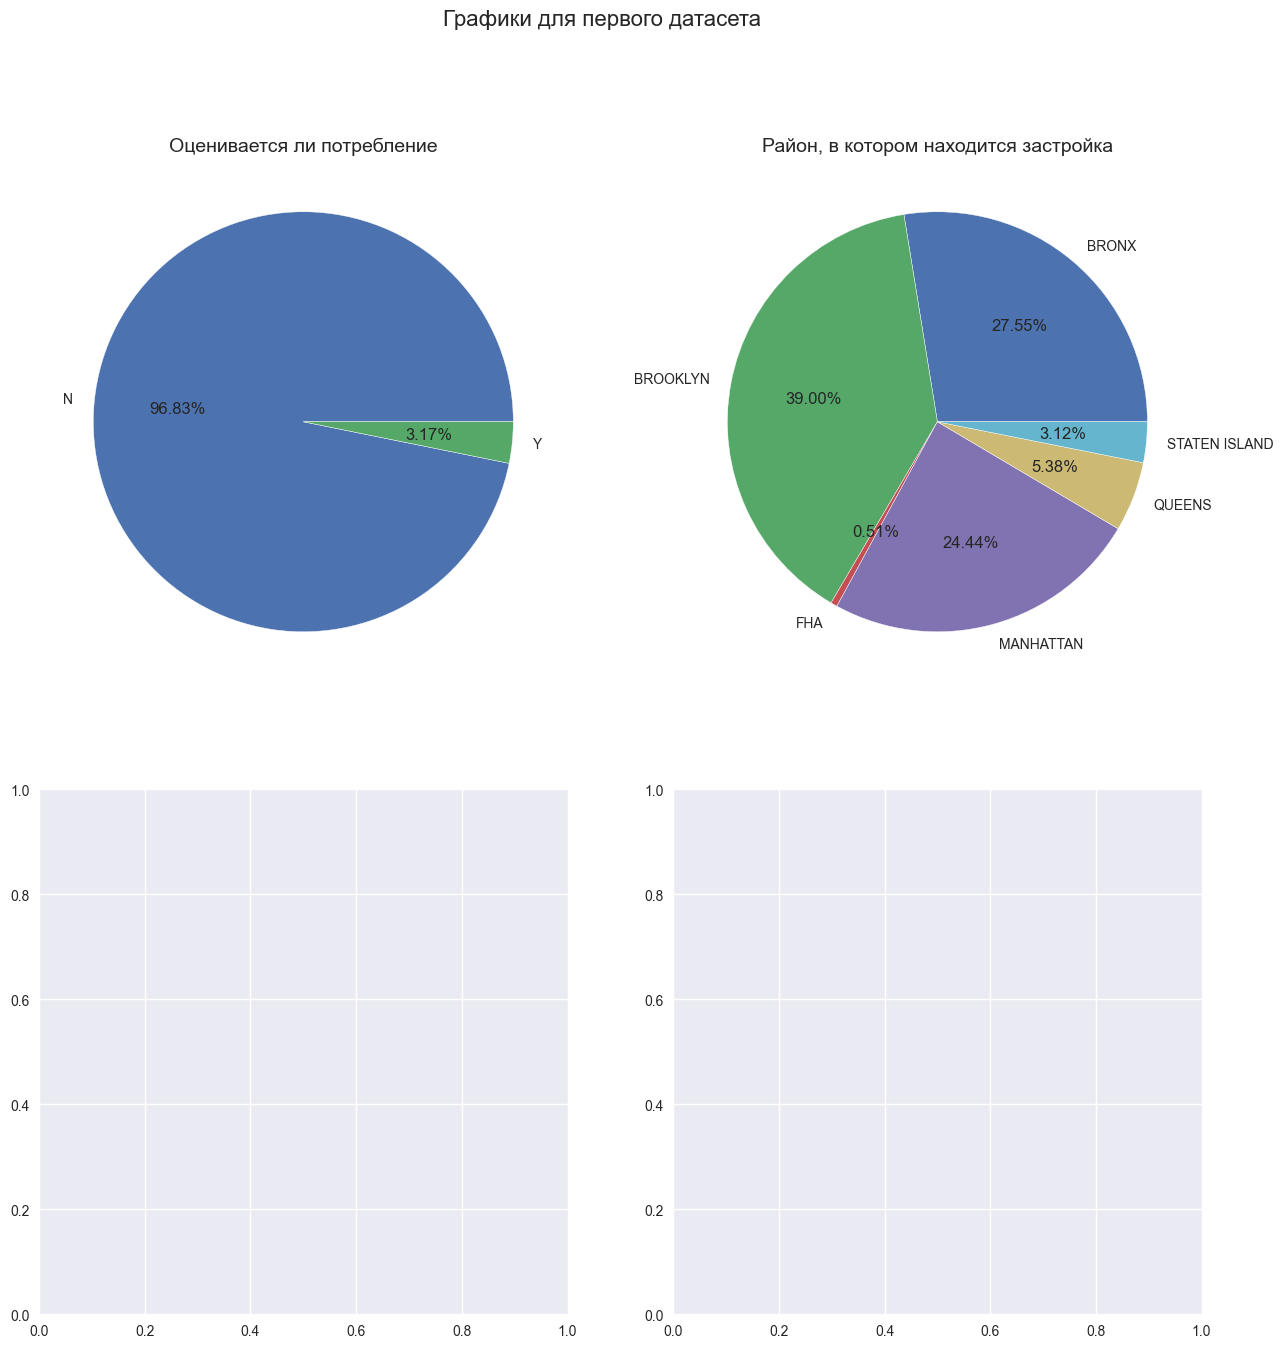

In [406]:
labels, counts = np.unique(data['Borough'], return_counts=True)

axes[0,1].set_title('Район, в котором находится застройка', fontsize=14)
axes[0,1].pie(counts, labels=labels, autopct='%.2f%%')
fig

C:\Users\podov\AppData\Local\Temp\ipykernel_4000\4119456993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ax=axes[1,0], data=data.corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm', linecolor='black', square=True)


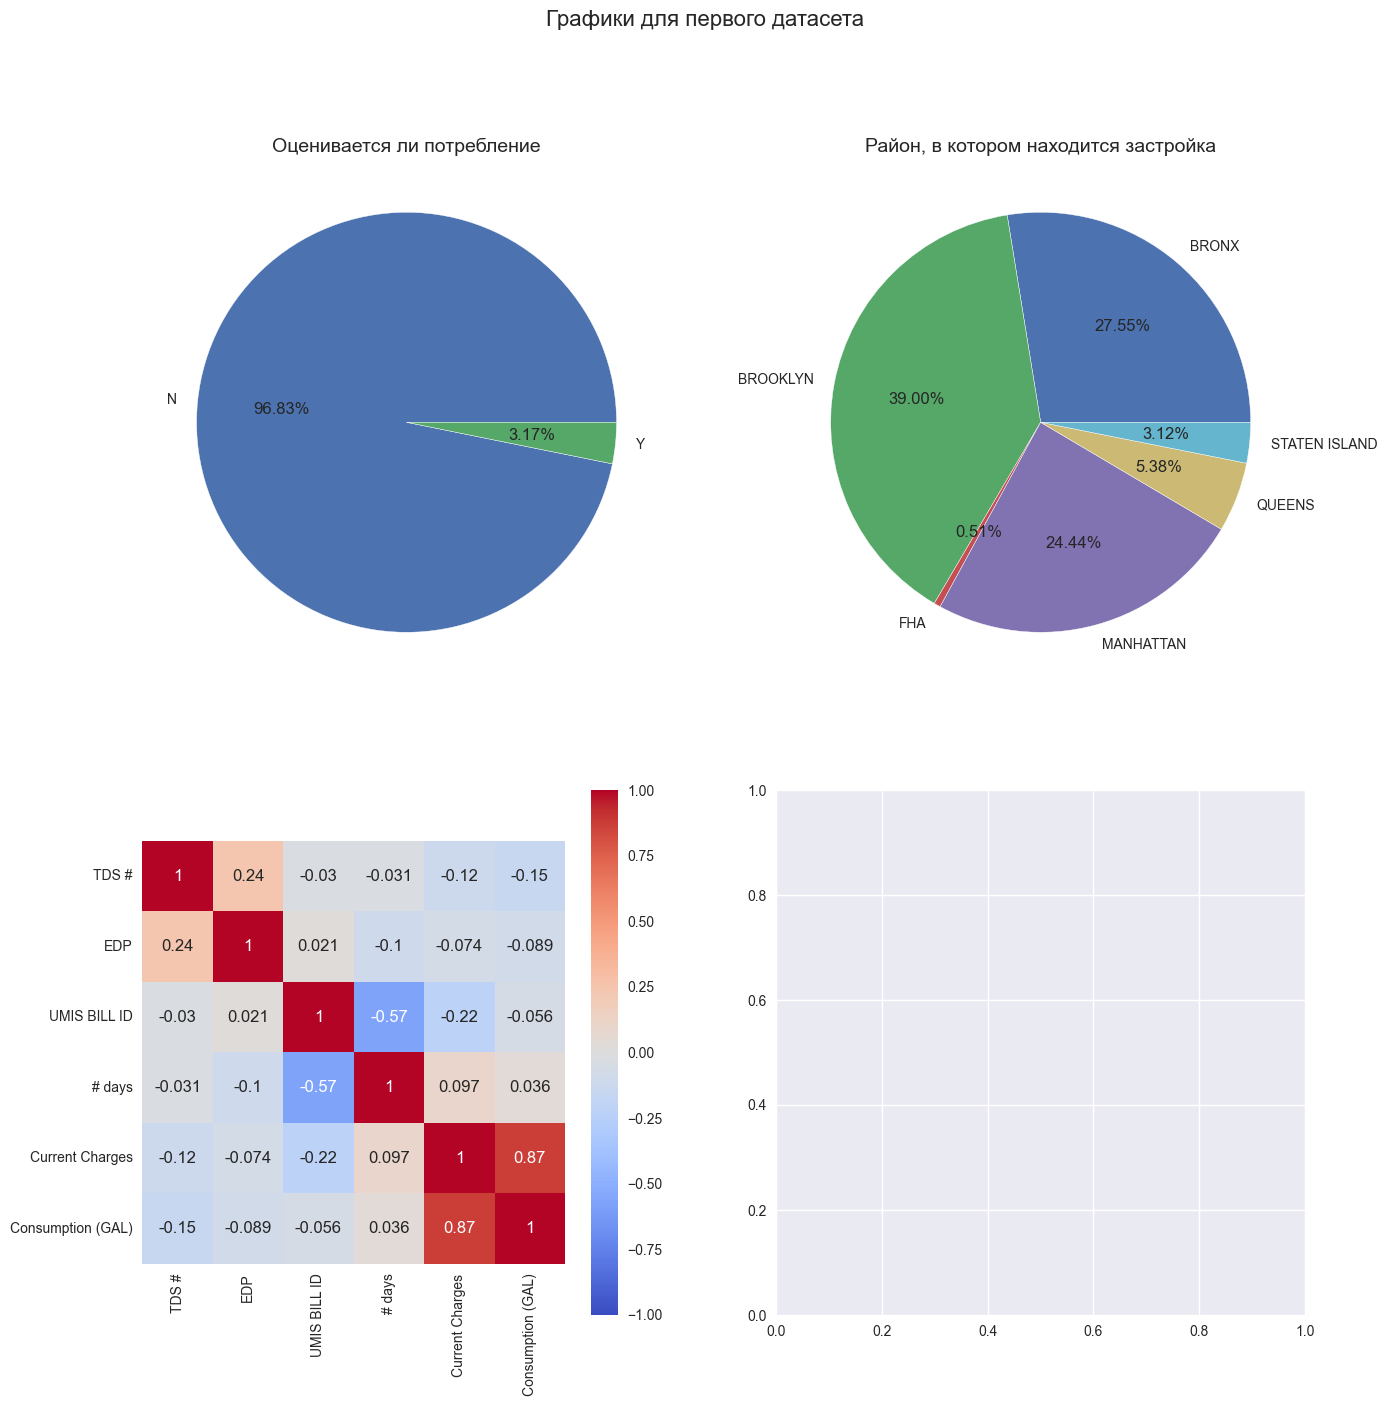

In [407]:
sns.heatmap(ax=axes[1,0], data=data.corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm', linecolor='black', square=True)
fig

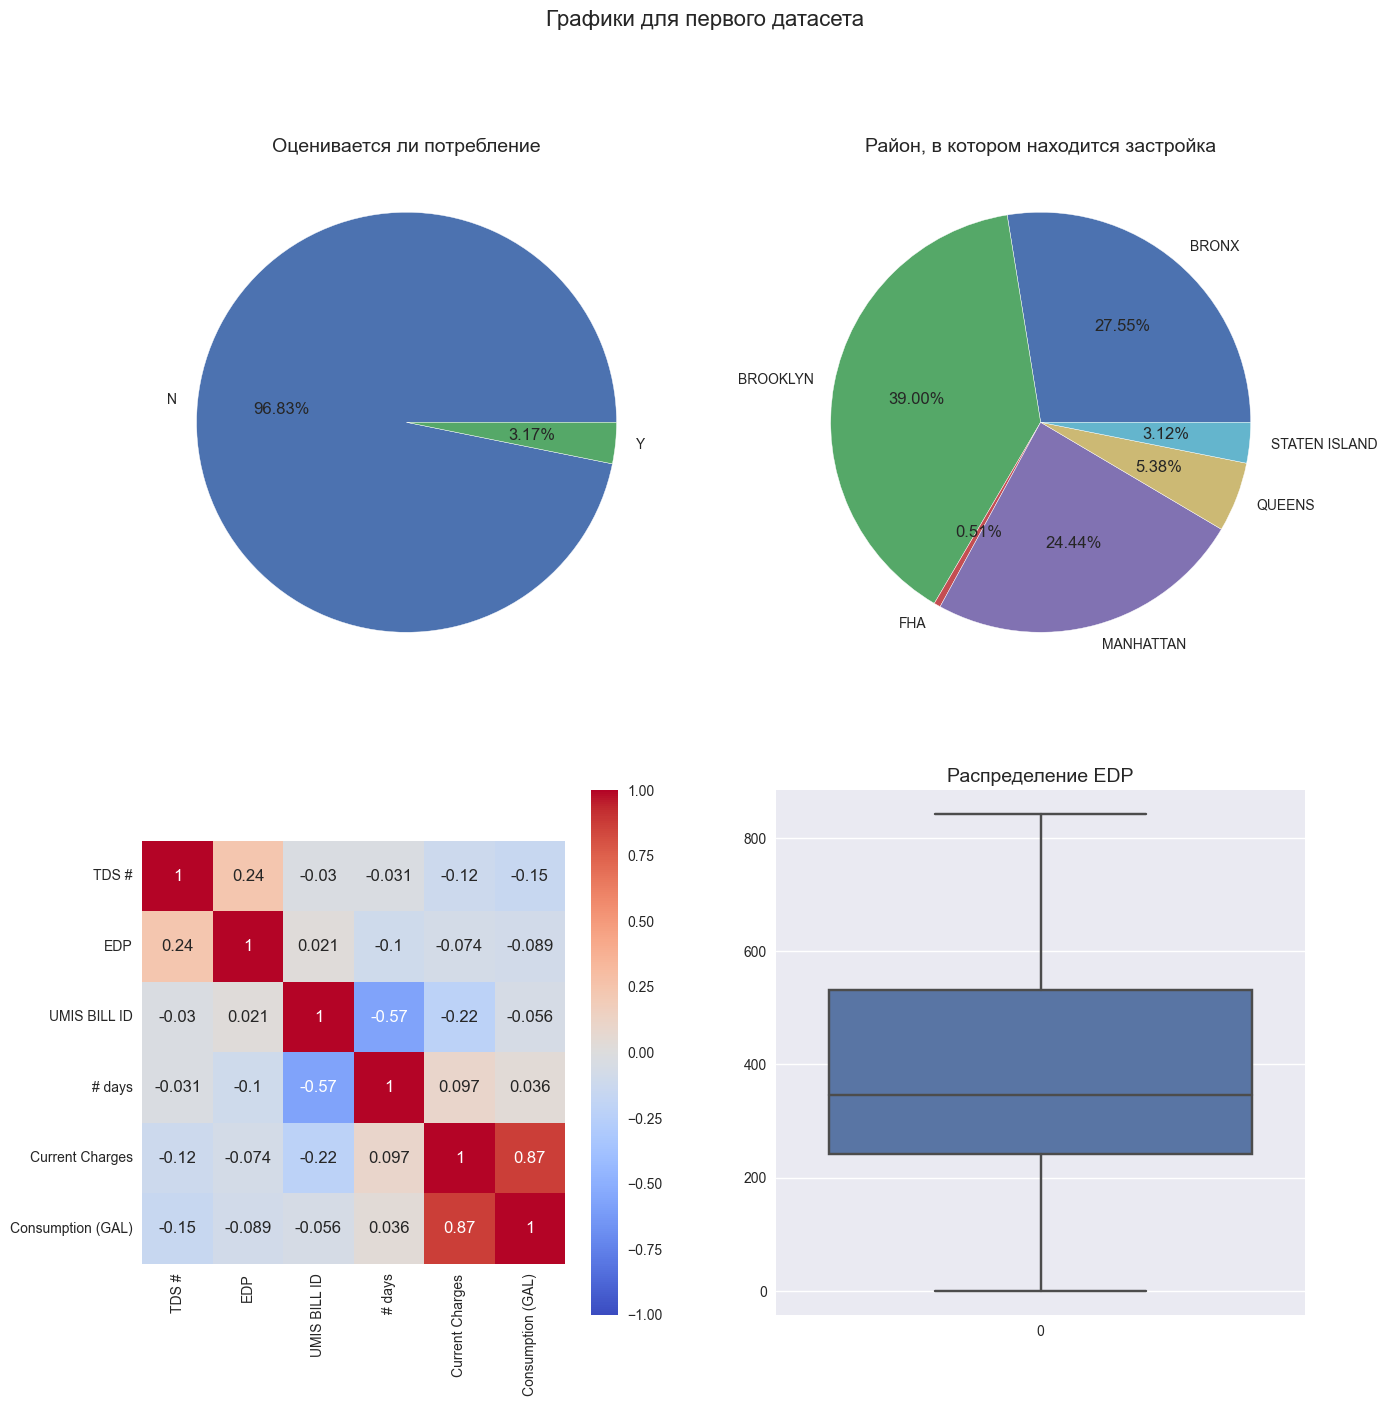

In [408]:
axes[1,1].set_title('Распределение EDP', fontsize=14)
sns.boxplot(ax=axes[1,1], data=data['EDP'])
fig

## Предобработка

In [409]:
for col in ('Location', 'Meter Scope', 'UMIS BILL ID', 'Service Start Date', 'Service End Date'):
    temp = data[col].value_counts(dropna=False)
    print(f'{col}\t{temp.count()}')
    display(temp)
    print('=====================================')


Location	18


NaN                          13666
BLD 01                         228
2991 8th Ave                   189
BLD 07                         115
733 SNEDIKER AVENUE             74
BLD 10                          69
BLD 04                          69
BLD 02                          49
BLD 05                          43
654 E 149th St                  41
BLD 06                          25
BLD 03 - Community Center       16
BLD 09                          12
BLD 2                           12
BLD 50                           9
BLD 24                           6
BLD 03                           3
BLD 4                            2
Name: Location, dtype: int64

Meter Scope	4


NaN                 14606
Community Center       16
BLD 01                  5
BLD 1-6                 1
Name: Meter Scope, dtype: int64

UMIS BILL ID	12272


4244874     6
4244879     6
4243149     6
4243003     4
4431407     4
           ..
5299804     1
5367549     1
5386334     1
5534473     1
11079150    1
Name: UMIS BILL ID, Length: 12272, dtype: int64

Service Start Date	926


08/23/2016    334
10/24/2016    298
09/22/2016    297
01/26/2016    254
06/23/2016    253
             ... 
12/29/2018      1
12/22/2018      1
12/15/2018      1
12/08/2018      1
04/27/2021      1
Name: Service Start Date, Length: 926, dtype: int64

Service End Date	838


09/22/2016    334
11/22/2016    298
10/24/2016    297
01/26/2016    255
07/25/2016    253
             ... 
11/11/2019      1
06/26/2020      1
06/05/2020      1
12/12/2019      1
05/25/2021      1
Name: Service End Date, Length: 838, dtype: int64

In [410]:
data.drop(columns=['Meter Scope', 'Location', 'UMIS BILL ID', 'Service Start Date', 'Service End Date'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14628 entries, 0 to 14627
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Development Name   14628 non-null  object 
 1   Borough            14628 non-null  object 
 2   Account Name       14628 non-null  object 
 3   Meter AMR          14073 non-null  object 
 4   TDS #              14628 non-null  int64  
 5   EDP                14628 non-null  int64  
 6   RC Code            14628 non-null  object 
 7   Funding Source     13106 non-null  object 
 8   AMP #              12490 non-null  object 
 9   Vendor Name        14628 non-null  object 
 10  Revenue Month      14628 non-null  object 
 11  # days             14628 non-null  int64  
 12  Meter Number       14628 non-null  object 
 13  Estimated          14628 non-null  object 
 14  Current Charges    14628 non-null  float64
 15  Consumption (GAL)  14628 non-null  float64
dtypes: float64(2), int64(3

In [411]:
for col in ('Meter AMR', 'Funding Source', 'AMP #'):
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isna().any()

Development Name     False
Borough              False
Account Name         False
Meter AMR            False
TDS #                False
EDP                  False
RC Code              False
Funding Source       False
AMP #                False
Vendor Name          False
Revenue Month        False
# days               False
Meter Number         False
Estimated            False
Current Charges      False
Consumption (GAL)    False
dtype: bool

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14628 entries, 0 to 14627
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Development Name   14628 non-null  object 
 1   Borough            14628 non-null  object 
 2   Account Name       14628 non-null  object 
 3   Meter AMR          14628 non-null  object 
 4   TDS #              14628 non-null  int64  
 5   EDP                14628 non-null  int64  
 6   RC Code            14628 non-null  object 
 7   Funding Source     14628 non-null  object 
 8   AMP #              14628 non-null  object 
 9   Vendor Name        14628 non-null  object 
 10  Revenue Month      14628 non-null  object 
 11  # days             14628 non-null  int64  
 12  Meter Number       14628 non-null  object 
 13  Estimated          14628 non-null  object 
 14  Current Charges    14628 non-null  float64
 15  Consumption (GAL)  14628 non-null  float64
dtypes: float64(2), int64(3

In [413]:
for col in data:
    temp = data[col].value_counts(dropna=False)
    print(f'{col}:\t{temp.count()}')
    display(temp)
    print('=====================================')


Development Name:	277


SOTOMAYOR HOUSES                   744
PELHAM PARKWAY                     596
WHITMAN                            454
TAFT                               411
LENOX ROAD-ROCKAWAY PARKWAY        376
                                  ... 
BARUCH/BARUCH HOUSES ADDITION        2
BRYANT AVENUE-EAST 174TH STREET      2
SARATOGA SQUARE                      2
EAGLE AVENUE-EAST 163RD STREET       2
SAINT MARY'S PARK                    1
Name: Development Name, Length: 277, dtype: int64

Borough:	6


BROOKLYN         5705
BRONX            4030
MANHATTAN        3575
QUEENS            787
STATEN ISLAND     457
FHA                74
Name: Borough, dtype: int64

Account Name:	229


SOTOMAYOR HOUSES                               744
PELHAM PARKWAY                                 596
WHITMAN/WHITMAN CHILD CENTER                   536
TAFT                                           411
LENOX ROAD-ROCKAWAY PARKWAY                    376
                                              ... 
FOREST HILLS COOP (108TH STREET-62ND DRIVE)      4
EAGLE AVENUE-EAST 163RD STREET                   2
BRYANT AVENUE-EAST 174TH STREET                  2
SARATOGA SQUARE                                  2
SAINT MARYS PARK                                 1
Name: Account Name, Length: 229, dtype: int64

Meter AMR:	3


Not Applicable    14438
NONE                140
AMR                  50
Name: Meter AMR, dtype: int64

TDS #:	247


67     744
39     596
514    536
97     411
348    376
      ... 
200      4
259      2
224      2
235      2
93       1
Name: TDS #, Length: 247, dtype: int64

EDP:	208


0      1712
222     744
586     596
509     475
261     411
       ... 
309       4
343       2
352       2
543       2
673       1
Name: EDP, Length: 208, dtype: int64

RC Code:	247


B006700    744
B003900    596
K051400    536
M009700    411
K034800    376
          ... 
Q020000      4
K025900      2
B022400      2
B023500      2
B009300      1
Name: RC Code, Length: 247, dtype: int64

Funding Source:	5


FEDERAL               13897
MIXED FINANCE/LLC1      394
MIXED FINANCE/LLC2      320
SECTION 8                13
FEDERAL-COOP              4
Name: Funding Source, dtype: int64

AMP #:	134


NY005011670P    3021
NY005010670P     861
NY005010390P     601
NY005005140P     433
NY005010970P     411
                ... 
NY005010320P      10
NY005015300P       8
NY005020920P       6
NY005002000P       4
NY005020930P       1
Name: AMP #, Length: 134, dtype: int64

Vendor Name:	7


S.J. Fuel Co., Inc.                  7232
East Coast Petroleum, Inc.           5258
East River Energy                    1631
Rucci Oil Company, Inc.               457
UNITED METRO ENERGY                    46
CONSOLIDATED EDISON COMPANY OF NY       2
National Grid NYC                       2
Name: Vendor Name, dtype: int64

Revenue Month:	143


2020-03    491
2020-01    433
2020-02    404
2020-04    353
2016-09    341
          ... 
2021-07      9
2021-04      8
2021-06      8
2021-09      5
2021-10      3
Name: Revenue Month, Length: 143, dtype: int64

# days:	31


1       3229
29      2850
30      2288
0       2044
32      1375
31      1006
33       980
28       399
34       193
25        71
36        29
21        29
2         27
27        21
3         21
26        15
35        11
38         8
23         8
18         4
4          4
1096       2
367        2
17         2
42         2
5          2
16         2
6          1
14         1
24         1
8          1
Name: # days, dtype: int64

Meter Number:	352


79471             548
79462             530
82010             467
90118             248
97157             221
                 ... 
2749                1
0348905501-OIL      1
Un-Metered          1
20676C-138          1
79382               1
Name: Meter Number, Length: 352, dtype: int64

Estimated:	2


N    14164
Y      464
Name: Estimated, dtype: int64

Current Charges:	8883


0.00         3604
10811.78       20
11236.92       14
11148.18       12
8330.00        11
             ... 
9324.92         1
103023.48       1
2568.11         1
28372.97        1
5168.45         1
Name: Current Charges, Length: 8883, dtype: int64

Consumption (GAL):	5574


 0.0        2659
 11600.0     287
 10000.0     191
 4000.0      130
 8000.0      126
            ... 
 1390.0        1
 1173.0        1
 1489.0        1
 2073.0        1
-5050.0        1
Name: Consumption (GAL), Length: 5574, dtype: int64

In [416]:
for col in ('Development Name', 'Borough', 'Account Name', 'Meter AMR',
            'RC Code', 'Funding Source', 'AMP #', 'Vendor Name',
            'Revenue Month', 'Meter Number', 'Estimated'):
    data[col] = data[col].map({v: k+1 for k, v in enumerate(data[col].unique())})
data.head()

,Development Name,Borough,Account Name,Meter AMR,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,Revenue Month,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
index,,,,,,,,,,,,,,,,
0,1,1,1,1,118,248,1,1,1,1,1,33,1,1,303.47,148.0
1,1,1,1,1,118,248,1,1,1,1,2,30,1,1,504.41,246.0
2,1,1,1,1,118,248,1,1,1,1,3,29,1,1,200.94,98.0
3,1,1,1,1,118,248,1,1,1,1,4,28,1,1,789.42,385.0
4,1,1,1,1,118,248,1,1,1,1,5,30,1,1,488.01,238.0


## Обучение

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [418]:
def print_metrics(y_test, y_pred):
    print(
        f'MAE: {mean_absolute_error(y_test, y_pred)}\n'
        f'MSE: {mean_squared_error(y_test, y_pred)}\n'
        f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}\n'
        f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}\n'
        f'R^2: {r2_score(y_test, y_pred)}'
    )

In [419]:
y = data['Consumption (GAL)']
X = data.drop(['Consumption (GAL)'], axis=1)

X.shape, y.shape

((14628, 15), (14628,))

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [421]:
params = {
    'positive': [False, True]
}

lr = GridSearchCV(LinearRegression(), params).fit(X_train, y_train)
print_metrics(y_test, lr.predict(X_test))
print(lr.best_params_)

MAE: 3793.7866107087166
MSE: 102364963.53586578
RMSE: 10117.557192122305
MAPE: 2.0321133543705472e+18
R^2: 0.7828855377890624
{'positive': False}


In [422]:
params = {
    'alpha': np.arange(0, 1, 0.05)
}

ls = GridSearchCV(Lasso(random_state=42), params).fit(X_train, y_train)

In [423]:
print_metrics(y_test, lr.predict(X_test))
print(ls.best_params_)

MAE: 3793.7866107087166
MSE: 102364963.53586578
RMSE: 10117.557192122305
MAPE: 2.0321133543705472e+18
R^2: 0.7828855377890624
{'alpha': 0.9500000000000001}


In [424]:
params = {
    'alpha': np.arange(0, 1, 0.05)
}

rd = GridSearchCV(Ridge(random_state=42), params).fit(X_train, y_train)

In [425]:
print_metrics(y_test, rd.predict(X_test))
print(rd.best_params_)

MAE: 3793.715717964589
MSE: 102364904.52496794
RMSE: 10117.554275859751
MAPE: 2.0320635666292536e+18
R^2: 0.7828856629502398
{'alpha': 0.9500000000000001}


In [426]:
params = {
    'max_depth': range(7, 14),
    'max_leaf_nodes': range(5, 16, 2)
}

dt = GridSearchCV(DecisionTreeRegressor(random_state=42), params).fit(X_train, y_train)

In [427]:
print_metrics(y_test, dt.predict(X_test))
print(dt.best_params_)

MAE: 3108.6923906634584
MSE: 66573578.77752567
RMSE: 8159.263372236839
MAPE: 4.2432010584841786e+17
R^2: 0.8587984965317194
{'max_depth': 8, 'max_leaf_nodes': 15}


In [428]:
params = {
    'n_estimators': range(7, 14)
}

bg = GridSearchCV(BaggingRegressor(random_state=42), params).fit(X_train, y_train)

In [429]:
print_metrics(y_test, bg.predict(X_test))
print(bg.best_params_)

MAE: 1015.6674838416944
MSE: 29069574.118175432
RMSE: 5391.620732041102
MAPE: 1.5775977599994982e+16
R^2: 0.9383438948898047
{'n_estimators': 13}


In [ ]:
params = {
    'n_estimators': [100, 105, 110],
    'alpha': np.arange(0, 1, 0.25)
}

gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), params).fit(X_train, y_train)

In [431]:
print_metrics(y_test, gbr.predict(X_test))
print(gbr.best_params_)

MAE: 2061.8448452473503
MSE: 46322650.98986779
RMSE: 6806.074565406097
MAPE: 5.96408302263728e+17
R^2: 0.9017503928057738
{'alpha': 0.25, 'n_estimators': 110}


In [432]:
import tensorflow as tf

In [30]:
X_train.shape

(10239, 15)

In [436]:
big_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(37, activation="relu", input_shape=(15,)),
        tf.keras.layers.Dense(23, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(17, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(11, activation="relu"),
        tf.keras.layers.Dense(7, activation="relu"),
        tf.keras.layers.Dense(1, activation="relu"),
    ]
)
big_model.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse")
big_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
320/320 [==============================] - 3s 3ms/step - loss: 192904720.0000
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 103701016.0000
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 99091672.0000
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 98904968.0000
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 95184272.0000
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 92081968.0000
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 87993688.0000
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 88572168.0000
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 88584112.0000
Epoch 10/50
320/320 [==============================] - 1s 3ms/step - loss: 86586608.0000
Epoch 11/50
320/320 [==============================] - 1s 3ms/step - loss: 88798736.0000
Epoch 12/50
320/320 [=======

In [437]:
print_metrics(y_test, big_model.predict(X_test))

138/138 [==============================] - 1s 3ms/step
MAE: 2928.9595577355553
MSE: 99408427.96652186
RMSE: 9970.377523771196
MAPE: 1.9285098430263885e+18
R^2: 0.7891563027849461


## XGBoost ~ CatBoost

In [458]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [456]:
params = {
    'max_depth': range(3, 8),
    'n_estimators': range(95, 111, 5)
}

xgbr = GridSearchCV(XGBRegressor(seed=42), params).fit(X_train, y_train)

In [457]:
print_metrics(y_test, xgbr.predict(X_test))
print(xgbr.best_params_)

MAE: 1048.8251967555773
MSE: 20357685.376297817
RMSE: 4511.949177051733
MAPE: 1.585088616131709e+17
R^2: 0.9568216725756392
{'max_depth': 7, 'n_estimators': 110}


In [486]:
params = {
    'depth': range(3, 8, 2)
}

cbr = GridSearchCV(CatBoostRegressor(random_seed=42), params).fit(X_train, y_train)

Learning rate set to 0.05708
0:	learn: 18043.3101847	total: 1.53ms	remaining: 1.53s
1:	learn: 17471.5892480	total: 3.18ms	remaining: 1.58s
2:	learn: 16916.3669498	total: 4.99ms	remaining: 1.66s
3:	learn: 16376.5644384	total: 6.7ms	remaining: 1.67s
4:	learn: 15897.8810831	total: 8.51ms	remaining: 1.69s
5:	learn: 15425.5878548	total: 10.2ms	remaining: 1.69s
6:	learn: 15044.7688060	total: 11.8ms	remaining: 1.68s
7:	learn: 14630.9159832	total: 13.4ms	remaining: 1.66s
8:	learn: 14213.8848734	total: 15.3ms	remaining: 1.69s
9:	learn: 13843.1259134	total: 17ms	remaining: 1.68s
10:	learn: 13499.7917735	total: 18.7ms	remaining: 1.68s
11:	learn: 13173.9296872	total: 20.3ms	remaining: 1.67s
12:	learn: 12855.2246981	total: 22ms	remaining: 1.67s
13:	learn: 12568.0968104	total: 23.8ms	remaining: 1.67s
14:	learn: 12315.5884640	total: 25.6ms	remaining: 1.68s
15:	learn: 12077.8505918	total: 27.3ms	remaining: 1.68s
16:	learn: 11841.2955105	total: 29ms	remaining: 1.68s
17:	learn: 11615.4191393	total: 30.5

In [487]:
print_metrics(y_test, cbr.predict(X_test))
print(cbr.best_params_)

MAE: 1273.6739112695266
MSE: 22384025.97568918
RMSE: 4731.175961184405
MAPE: 3.018891397508664e+17
R^2: 0.952523836340501
{'depth': 7}
